## Preprocessing on Eye fundus Image dataset from Kaggle

Author: Mridul Ahluwalia

In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from tqdm import tqdm

## Initializing Notebook

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Configuration

In [3]:
IMG_SIZE = 512

## Load Dataset

In [6]:
DATA_PATH = '../../data/'
IMG_RAW_TRAIN_PATH = '../../data/raw/Training Images/'
METADATA_FILE = 'metadata/full_df.csv'
PROCESSED_IMG_PATH = '../../data/processed/'

metadata_file = os.path.join(DATA_PATH, METADATA_FILE)
metadata_file

'../../data/metadata/full_df.csv'

In [7]:
# metadata_df = pd.read_csv(metadata_file)
metadata_df = pd.read_csv(metadata_file)
metadata_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


## Image Data

(2304, 3456, 3)


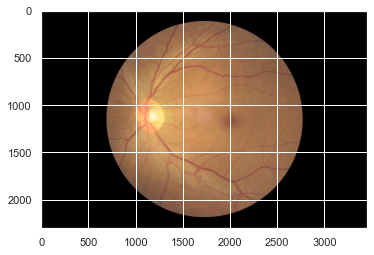

In [8]:
img = '1_left.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)
print(image.shape)

In [9]:
def crop(image): 
    # Remove vertical black borders (the image must be already normalized)
    sums = image.sum(axis=0)
    sums = sums.sum(axis=1)
    filter_arr = []
    for s in sums:
        if s == 0:
            filter_arr.append(False)
        else:
            filter_arr.append(True)
    image = image[:, filter_arr]
    
    # Crop to a square shape
    h = image.shape[0]
    w = image.shape[1]    
    
    if h < w:
        x = (w - h)//2
        image = image[:, x:x+h, :]        
    elif h > w:
        x = (h - w)//2
        image = image[x:x+w, :, :]           
    else:
        pass
    
    return image


def preprocess_image(file_name):
    image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, file_name))
    
    norm_img = np.zeros(image.shape)
    norm_img = cv2.normalize(image,  norm_img, 0, 255, cv2.NORM_MINMAX)
    
    image = crop(norm_img)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
    return image

In [ ]:
img = '1_left.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)
print(image.shape)

(512, 512, 3)


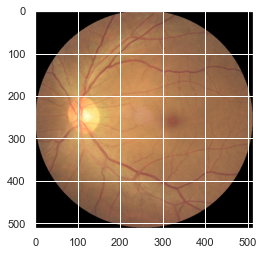

In [8]:
p_image = preprocess_image(img)
image_rgb_2 = cv2.cvtColor(p_image, cv2.COLOR_BGR2RGB) 
print(image_rgb_2.shape)
plt.imshow(image_rgb_2)

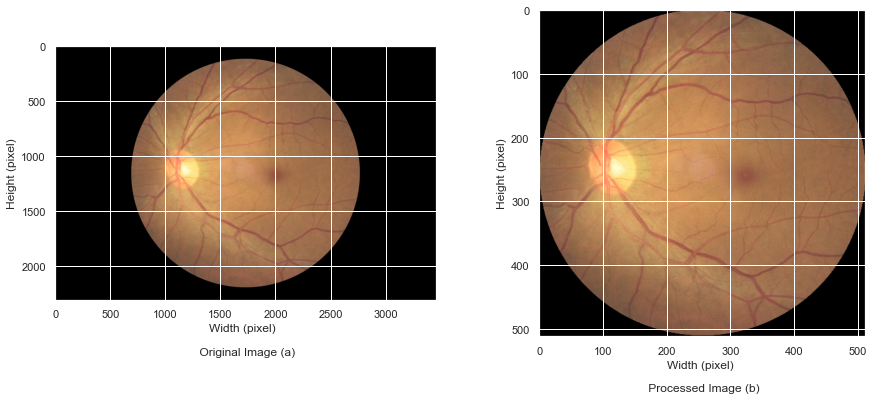

In [22]:
chart, ax = plt.subplots(figsize=[15,6])

plt.subplot(1, 2, 1)
img = '1_left.jpg'
image = cv2.imread(os.path.join(IMG_RAW_TRAIN_PATH, img))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.xlabel('Width (pixel)  \n\n Original Image (a)')
plt.ylabel('Height (pixel)')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
p_image = preprocess_image(img)
image_rgb_2 = cv2.cvtColor(p_image, cv2.COLOR_BGR2RGB)
plt.xlabel('Width (pixel) \n\n Processed Image (b)')
plt.ylabel('Height (pixel)')
plt.imshow(image_rgb_2)

## Drop Images below set threshold

In [9]:
metadata_df["to_drop"] = metadata_df[["height", "width"]].apply(lambda row: 1 if (row.height or row.width) < IMG_SIZE else 0, axis=1)
metadata_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,to_drop
0,0,0,0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1,"(1728, 2304, 3)",1728,2304,0,1,0,0
1,1,1,1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1,"(2304, 3456, 3)",2304,3456,0,1,0,0
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0,0


In [10]:
metadata_df[(metadata_df["to_drop"] == 1)].describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,N,D,G,C,A,H,M,O,diagnosis_count,height,width,is_vertical,is_horizontal,is_square,to_drop
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.0,18.0,18.0,18.000000,18.0,18.000000,18.000000,18.0,18.0,18.0,18.0
mean,3165.055556,3165.055556,3165.055556,2241.722222,54.611111,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,1.0,252.000000,285.000000,0.0,1.0,0.0,1.0
std,1820.140023,1820.140023,1820.140023,1179.104885,15.696155,0.427793,0.0,0.0,0.0,0.0,0.0,0.0,0.427793,0.0,65.855457,36.014703,0.0,0.0,0.0,0.0
min,75.000000,75.000000,75.000000,3.000000,28.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,188.000000,250.000000,0.0,1.0,0.0,1.0
25%,1822.500000,1822.500000,1822.500000,2497.000000,48.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,188.000000,250.000000,0.0,1.0,0.0,1.0
50%,2802.500000,2802.500000,2802.500000,2639.000000,51.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,252.000000,285.000000,0.0,1.0,0.0,1.0
75%,4988.250000,4988.250000,4988.250000,2887.000000,64.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,316.000000,320.000000,0.0,1.0,0.0,1.0
max,5600.000000,5600.000000,5600.000000,3305.000000,86.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,316.000000,320.000000,0.0,1.0,0.0,1.0


In [11]:
metadata_df.drop(metadata_df[metadata_df["to_drop"] == 1].index, inplace = True)
metadata_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,to_drop
0,0,0,0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,N,0_right.jpg,right,normal fundus,1,"(1728, 2304, 3)",1728,2304,0,1,0,0
1,1,1,1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,N,1_right.jpg,right,normal fundus,1,"(2304, 3456, 3)",2304,3456,0,1,0,0
2,2,2,2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,D,2_right.jpg,right,moderate non proliferative retinopathy,2,"(1536, 2048, 3)",1536,2048,0,1,0,0
3,3,3,3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,D,4_right.jpg,right,mild nonproliferative retinopathy,2,"(894, 1920, 3)",894,1920,0,1,0,0
4,4,4,4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,D,5_right.jpg,right,moderate non proliferative retinopathy,1,"(1728, 2304, 3)",1728,2304,0,1,0,0


In [22]:
metadata_df[(metadata_df["filename"] == "258_left.jpg")]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,labels,filename,Eye Side,Diagnostic Keywords,diagnosis_count,Image Size,height,width,is_vertical,is_horizontal,is_square,to_drop
3415,3415,3415,3415,258,58,Female,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,N,258_left.jpg,left,normal fundus,1,"(2976, 2976, 3)",2976,2976,0,0,1,0


## Save Processed Image

In [12]:
# metadata_df.reset_index(inplace=True)

In [13]:
# index = 0
# for img in tqdm(metadata_df.filename):
#     processed_image = preprocess_image(img)
#     out_file_path = os.path.join(PROCESSED_IMG_PATH, metadata_df["labels"][index], img)
#     index += 1
#     cv2.imwrite(out_file_path, processed_image)